In [51]:
import pandas as pd  
import os
from scipy import stats

In [52]:
# Load dataframe from csv file
df = pd.read_csv('survey_responses/survey_responses_2025_21_11.02.csv')
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,human_story,opro_joke,opro_poem,opro_sixword,opro_story,r1_joke,r1_poem,r1_sixword,r1_story,Create New Field or Choose From Dropdown...
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,human_story,opro_joke,opro_poem,opro_sixword,opro_story,r1_joke,r1_poem,r1_sixword,r1_story,Create New Field or Choose From Dropdown...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""human_story""}","{""ImportId"":""opro_joke""}","{""ImportId"":""opro_poem""}","{""ImportId"":""opro_sixword""}","{""ImportId"":""opro_story""}","{""ImportId"":""r1_joke""}","{""ImportId"":""r1_poem""}","{""ImportId"":""r1_sixword""}","{""ImportId"":""r1_story""}","{""ImportId"":""Create New Field or Choose From D..."
2,2025-02-17 14:13:20,2025-02-17 14:13:20,Survey Preview,NaN,100,0,True,2025-02-17 14:13:20,R_5Ih3LGDSj9xA8k9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-17 14:13:26,2025-02-17 14:13:26,Survey Preview,NaN,100,0,True,2025-02-17 14:13:27,R_5dGIe8lW77IicZg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-02-17 14:13:31,2025-02-17 14:13:31,Survey Preview,NaN,100,0,True,2025-02-17 14:13:32,R_5fCO9eGtcpGlhcD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2025-02-19 16:57:44,2025-02-19 17:19:19,IP Address,160.223.189.108,100,1294,True,2025-02-19 17:19:20,R_1azoZuAqJr2QTXb,NaN,...,"""Smoke curled into the midnight air as Ava gri...",Why did the mathematician become a gardener? B...,"""In the marrow's quiet echo, <br>\nloneliness...",Moonlit beach proposal; tides whispered goodbye.,"""I plummet from the brooding sky, cradling whi...","""Why did the pandas start a band?<br>\nBecause...","""Bare branches sketch prayers<br>\nagainst twi...",Last letter arrived after her funeral.,"""The Time Market bustled under the flickering ...",NaN
82,2025-02-19 08:54:26,2025-02-19 17:30:18,IP Address,172.224.246.9,100,30952,True,2025-02-19 17:30:20,R_6kjJy4KT5tkLNC5,NaN,...,"""The wind howled through the deserted streets ...",Why don't parallel universes ever host comedy ...,"""In the hollow of solitude, <br>\na lantern h...","""Silent snowfall blankets forgotten wedding vo...","""I am born from the grey womb of a cloud, heav...","""Why did the sunglasses go to school?<br>\nTo ...","""Whispers of the night descend,<br>\nStars lik...",Library closed. All stories left untold.,"""In the dim glow of the library's closing hour...",NaN
83,2025-02-19 17:29:14,2025-02-19 17:41:49,IP Address,65.130.250.124,100,755,True,2025-02-19 17:41:50,R_1cu1OljznynJE57,NaN,...,"""Smoke curled into the midnight air as Ava gri...",Why did the quantum physicist refuse to play h...,"""In a forest of glass, <br>\ngrief walks bare...","""Letter unopened; her perfume still lingers.""","""As I tumble from the sky, I shimmer with frag...","""Why did the duck refuse to work with the beav...","""Whispers of the night descend,<br>\nStars lik...",Library closed. All stories left untold.,"""In the dim glow of the library's closing hour...",NaN
84,2025-02-19 09:03:27,2025-02-19 22:20:03,IP Address,69.66.157.159,100,47796,True,2025-02-19 22:20:03,R_6eRuXcfktcPv1cO,NaN,...,"""In the heart of the bustling city, beneath th...",Why did the quantum physicist break up with th...,"""In the caverns of longing, <br>\na single ca...",Moonlit whispers; empty swing sways alone.,"""I am born in a thunderous cloud, teeming with...","""Why did the r

In [53]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q3', 'Q7', 'Q9', 'Q64', 'Q65',
       'Q66', 'Q84', 'Q85', 'Q86', 'Q89', 'Q90', 'Q91', 'Q49', 'Q50', 'Q51',
       'Q69', 'Q70', 'Q71', 'Q94', 'Q95', 'Q96', 'Q99', 'Q100', 'Q101', 'Q54',
       'Q55', 'Q56', 'Q74', 'Q75', 'Q76', 'Q104', 'Q105', 'Q106', 'Q109',
       'Q110', 'Q111', 'Q59', 'Q60', 'Q61', 'Q79', 'Q80', 'Q81', 'Q114',
       'Q115', 'Q116', 'Q119', 'Q120', 'Q121', 'Q92_1', 'Q92_2', 'Q92_3',
       'Q92_4', 'Q94_1', 'Q94_2', 'Q94_3', 'Q94_4', 'Q95_1', 'Q95_2', 'Q95_3',
       'Q95_4', 'Q96_1', 'Q96_2', 'Q96_3', 'Q96_4', 'basic_joke', 'basic_poem',
       'basic_sixword', 'basic_story', 'human_joke', 'human_poem',
       'human_sixword', 'human_story', 'op

In [54]:
def rename_columns(df):
    methods = ["basic", "human", "opro", "r1"]
    domains = ["joke", "poem", "six-word", "story"]
    new_column_names = []
    for domain in domains:
        for method in methods:
            for quality in ["quality", "novelty", "creative"]:
                new_column_names.append(f"{method}_{domain}_{quality}")
    old_column_names = list(df.columns[17:17+len(new_column_names)])
    # Rename columns
    df.rename(columns=dict(zip(old_column_names, new_column_names)), inplace=True)
    # Rename preference columns
    old_column_names = list(df.columns[17+len(new_column_names):81])
    new_column_names = []
    for domain in domains:
        for method in methods:
            new_column_names.append(f"{method}_{domain}_pref")
    # Rename columns
    df.rename(columns=dict(zip(old_column_names, new_column_names)), inplace=True)
    return df

In [55]:
renamed_df = rename_columns(df)
renamed_df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'basic_joke_quality',
       'basic_joke_novelty', 'basic_joke_creative', 'human_joke_quality',
       'human_joke_novelty', 'human_joke_creative', 'opro_joke_quality',
       'opro_joke_novelty', 'opro_joke_creative', 'r1_joke_quality',
       'r1_joke_novelty', 'r1_joke_creative', 'basic_poem_quality',
       'basic_poem_novelty', 'basic_poem_creative', 'human_poem_quality',
       'human_poem_novelty', 'human_poem_creative', 'opro_poem_quality',
       'opro_poem_novelty', 'opro_poem_creative', 'r1_poem_quality',
       'r1_poem_novelty', 'r1_poem_creative', 'basic_six-word_quality',
       'basic_six-word_novelty', 'basic_six-word_creative',
       'human_six-word_

In [56]:
len(renamed_df)

86

In [57]:
def clean(df):
    # Remove rows where `DistributionChannel` is `preview`
    clean_df = renamed_df[renamed_df['DistributionChannel'] != 'preview']
    return clean_df


In [58]:
clean_df = clean(renamed_df)
len(clean_df)

72

In [59]:
# Likert scale score mapping
likert_mapping = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neither agree nor disagree": 3,
    "Agree": 4,
    "Strongly agree": 5
}
preference_mapping = {
    1 : 4,
    2 : 3,
    3 : 2,
    4 : 1
}

In [60]:
pd.set_option('future.no_silent_downcasting', True)

def get_char_df(df):
    # Select columns from 17 to 81 but keep a dataframe
    # with the same number of rows as the original dataframe
    # and the same column names
    # but with the values replaced by the likert mapping
    char_df = df.iloc[2:, 17:65]
    # Replace values in the dataframe with the likert mapping
    char_df = char_df.replace(likert_mapping)
    # Replace NaN with 3
    char_df = char_df.fillna(3)
    # Force numeric
    char_df = char_df.astype(int)
    return char_df
char_df = get_char_df(clean_df)
char_df

,basic_joke_quality,basic_joke_novelty,basic_joke_creative,human_joke_quality,human_joke_novelty,human_joke_creative,opro_joke_quality,opro_joke_novelty,opro_joke_creative,r1_joke_quality,...,basic_story_creative,human_story_quality,human_story_novelty,human_story_creative,opro_story_quality,opro_story_novelty,opro_story_creative,r1_story_quality,r1_story_novelty,r1_story_creative
16,4,4,4,3,3,3,3,3,3,5,...,3,3,3,3,3,3,3,3,3,3
17,2,3,4,1,5,3,1,4,4,1,...,5,5,5,5,4,5,4,3,4,2
18,3,3,3,2,2,2,3,4,4,2,...,4,4,4,4,3,3,3,2,3,4
19,4,4,3,1,3,3,1,3,3,4,...,4,2,3,3,2,2,2,3,4,3
20,4,4,3,3,2,2,3,4,4,3,...,2,5,5,3,4,4,3,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,4,4,4,2,3,2,2,4,4,2,...,5,5,5,4,4,4,5,4,3,5
82,4,3,3,4,4,5,4,4,5,4,...,3,4,2,3,4,4,4,4,4,4
83,3,4,4,3,3,3,2,2,2,4,...,4,4,4,4,2,4,3,3,4,3
84,3,2,2,4,4,4,2,4,2,2,...,4,2,2,3,2,2,2,2,2,3


In [61]:
def get_mean_scores(df, categories=[]):
    """Get the mean Likert scores for each method averaged across all domains. With the 
    the margin of error of the mean."""
    # Get the mean Likert scores for each method averaged across all domains
    mean_likert_scores = {}
    for cat in categories:
        # Get the columns for the method
        cat_columns = [col for col in df.columns if cat in col]
        # Get the mean of the columns
        column_mean = df[cat_columns].mean(axis=1)
        # Get the mean of the mean
        mean_likert_scores[cat] = column_mean.mean()
        # Get the margin of error of the mean
        mean_likert_scores[cat + "_moe"] = column_mean.sem() * 1.96
    return mean_likert_scores

method_scores = get_mean_scores(char_df, categories=["basic", "human", "opro", "r1"])    
method_scores

{'basic': 3.452380952380952,
 'basic_moe': 0.14115066583969316,
 'human': 3.539285714285715,
 'human_moe': 0.1258925557281354,
 'opro': 3.4214285714285713,
 'opro_moe': 0.12431037464007662,
 'r1': 3.3583333333333325,
 'r1_moe': 0.1361219319370222}

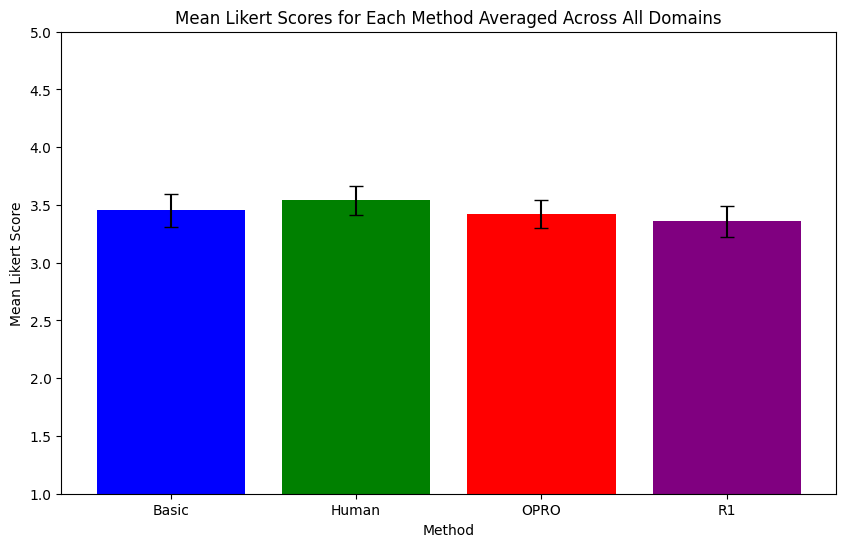

In [62]:
import matplotlib.pyplot as plt

def plot_mean_scores(scores, categories=[], xlabel="", ylabel="Mean Score", title="", save_path=None, show=True, ylim=None):
    """Plot the mean Likert scores for each method averaged across all domains."""
    # Generate bar graph of mean Likert scores for each method
    means = [scores[cat.lower().replace(" ", "_")] for cat in categories]
    errors = [scores[cat.lower().replace(" ", "_") + '_moe'] for cat in categories]

    plt.figure(figsize=(10, 6))
    plt.bar(categories, means, yerr=errors, capsize=5, color=['blue', 'green', 'red', 'purple'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if ylim:
        plt.ylim(ylim)
    # Set y-axis limits
    plt.title(title)
    # Save the plot
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path)
    if show:
        plt.show()

plot_mean_scores(method_scores, categories=["Basic", "Human", "OPRO", "R1"], 
                        xlabel="Method", 
                        ylabel="Mean Likert Score", 
                        ylim=(1, 5),
                        title="Mean Likert Scores for Each Method Averaged Across All Domains",
                        save_path="figures/method_mean_likert_scores.png")

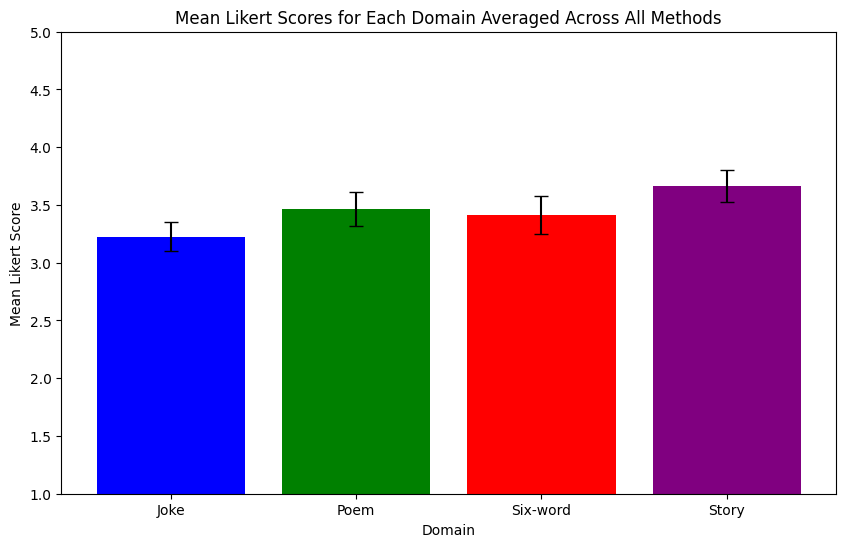

In [63]:
domain_scores = get_mean_scores(char_df, categories=["joke", "poem", "six-word", "story"])
plot_mean_scores(domain_scores, categories=["Joke", "Poem", "Six-word", "Story"], xlabel="Domain", ylabel="Mean Likert Score",ylim=(1,5), save_path="figures/domain_mean_likert_scores_domain.png",title="Mean Likert Scores for Each Domain Averaged Across All Methods")

In [64]:

pref_only_df = pd.read_csv('survey_responses/preferences_only_ 2025_21_11.00.csv')
# Rename preference columns
old_column_names = list(pref_only_df.columns[17:17+4*4])
print(old_column_names)
new_column_names = []
domains = ["joke", "poem", "six-word", "story"]
methods = ["basic", "human", "opro", "r1"]
for domain in domains:
    for method in methods:
        new_column_names.append(f"{method}_{domain}_pref")
# Rename columns
print(new_column_names)
pref_only_df.rename(columns=dict(zip(old_column_names, new_column_names)), inplace=True)
# Drop rows where `DistributionChannel` is `preview`
pref_only_df = pref_only_df[pref_only_df['DistributionChannel'] != 'preview']
# Drop rows where `StartDate` before 12:24 PM on Feb 19, 2025
pref_df = clean_df[clean_df['StartDate'] > '2025-02-19 12:24:00']
pref_df = pref_df.iloc[2:, 65:81]
pref_only_df = pref_only_df.iloc[2:, 17:17+4*4] # TODO: fix this
# Combine dataframes
pref_df = pd.concat([pref_df, pref_only_df], axis=0)
pref_df = pref_df.astype(float)
pref_df = pref_df.replace(preference_mapping)
pref_df

['Q92_1', 'Q92_2', 'Q92_3', 'Q92_4', 'Q94_1', 'Q94_2', 'Q94_3', 'Q94_4', 'Q95_1', 'Q95_2', 'Q95_3', 'Q95_4', 'Q96_1', 'Q96_2', 'Q96_3', 'Q96_4']
['basic_joke_pref', 'human_joke_pref', 'opro_joke_pref', 'r1_joke_pref', 'basic_poem_pref', 'human_poem_pref', 'opro_poem_pref', 'r1_poem_pref', 'basic_six-word_pref', 'human_six-word_pref', 'opro_six-word_pref', 'r1_six-word_pref', 'basic_story_pref', 'human_story_pref', 'opro_story_pref', 'r1_story_pref']


,basic_joke_pref,human_joke_pref,opro_joke_pref,r1_joke_pref,basic_poem_pref,human_poem_pref,opro_poem_pref,r1_poem_pref,basic_six-word_pref,human_six-word_pref,opro_six-word_pref,r1_six-word_pref,basic_story_pref,human_story_pref,opro_story_pref,r1_story_pref
79,3.0,4.0,1.0,2.0,3.0,4.0,1.0,2.0,3.0,2.0,4.0,1.0,3.0,4.0,1.0,2.0
80,2.0,4.0,1.0,3.0,3.0,4.0,2.0,1.0,4.0,2.0,1.0,3.0,4.0,3.0,1.0,2.0
81,4.0,3.0,1.0,2.0,3.0,4.0,1.0,2.0,2.0,1.0,4.0,3.0,1.0,4.0,3.0,2.0
83,4.0,3.0,2.0,1.0,4.0,3.0,2.0,1.0,4.0,3.0,2.0,1.0,1.0,4.0,3.0,2.0
85,1.0,2.0,3.0,4.0,4.0,1.0,3.0,2.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,4.0
3,2.0,4.0,3.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,3.0,1.0,4.0,3.0,2.0
4,4.0,3.0,1.0,2.0,1.0,3.0,4.0,2.0,2.0,4.0,1.0,3.0,1.0,3.0,4.0,2.0
5,1.0,2.0,4.0,3.0,2.0,4.0,1.0,3.0,3.0,1.0,2.0,4.0,2.0,4.0,1.0,3.0
6,2.0,4.0,3.0,1.0,4.0,3.0,2.0,1.0,1.0,3.0,2.0,4.0,2.0,3.0,1.0,4.0
7,3.0,1.0,2.0,4.0,4.0,2.0,3.0,1.0,1.0,3.0,2.0,4.0,2.0,1.0,4.0,3.0


In [65]:
len(pref_df)

28

In [66]:
mean_method_pref = get_mean_scores(pref_df, categories=["basic", "human", "opro", "r1"])
mean_method_pref

{'basic': 2.6481481481481484,
 'basic_moe': 0.20377463152642453,
 'human': 2.6265432098765427,
 'human_moe': 0.1986826079554947,
 'opro': 2.2314814814814814,
 'opro_moe': 0.24725170817684994,
 'r1': 2.4938271604938276,
 'r1_moe': 0.27137294978946275}

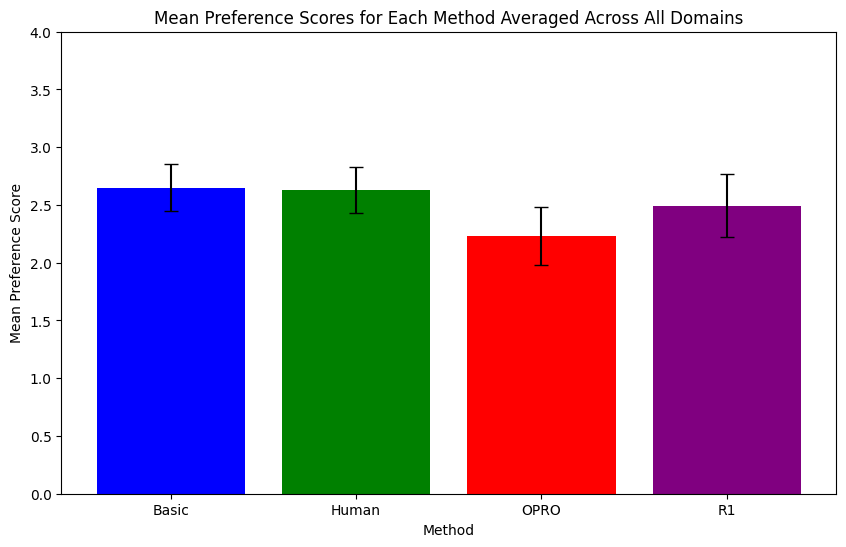

In [67]:
plot_mean_scores(mean_method_pref, categories=["Basic", "Human", "OPRO", "R1"], 
                        xlabel="Method", 
                        ylabel="Mean Preference Score", 
                        ylim=(0, 4),
                        title="Mean Preference Scores for Each Method Averaged Across All Domains",
                        save_path="figures/method_mean_pref_scores.png")

In [68]:
def get_char_scores(df):
    methods = ["basic", "human", "opro", "r1"]
    characteristics = ["quality", "novelty", "creative"]
    # Get the mean scores for each method and characteristic
    mean_scores = {}
    for method in methods:
        for characteristic in characteristics:
            # Get the columns for the method and characteristic
            columns = [col for col in char_df.columns if method in col and characteristic in col]
            # Get the mean of the columns
            column_mean = char_df[columns].mean(axis=1)
            # Get the mean of the mean
            mean_scores[f"{method}_{characteristic}"] = column_mean.mean()
            # Get the margin of error of the mean
            mean_scores[f"{method}_{characteristic}_moe"] = column_mean.sem() * 1.96
    return mean_scores
char_scores = get_char_scores(char_df)
char_scores


{'basic_quality': 3.3642857142857143,
 'basic_quality_moe': 0.16191266208955843,
 'basic_novelty': 3.4357142857142855,
 'basic_novelty_moe': 0.16823654844261413,
 'basic_creative': 3.557142857142857,
 'basic_creative_moe': 0.14351670104298267,
 'human_quality': 3.525,
 'human_quality_moe': 0.14894843967346358,
 'human_novelty': 3.482142857142857,
 'human_novelty_moe': 0.13463450254434156,
 'human_creative': 3.6107142857142858,
 'human_creative_moe': 0.14367742654484983,
 'opro_quality': 3.2214285714285715,
 'opro_quality_moe': 0.15845467509029518,
 'opro_novelty': 3.4964285714285714,
 'opro_novelty_moe': 0.1383390604716322,
 'opro_creative': 3.5464285714285713,
 'opro_creative_moe': 0.13499269974893918,
 'r1_quality': 3.107142857142857,
 'r1_quality_moe': 0.15657012134679696,
 'r1_novelty': 3.482142857142857,
 'r1_novelty_moe': 0.15392850777957398,
 'r1_creative': 3.4857142857142858,
 'r1_creative_moe': 0.15150816690093363}

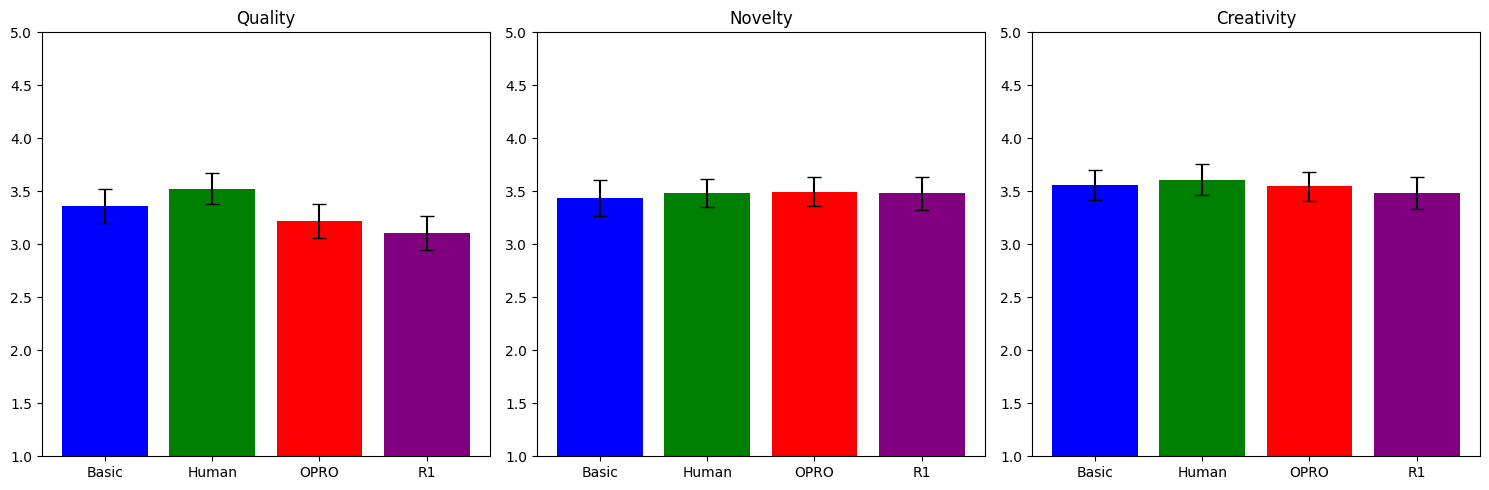

In [69]:
def plot_char_scores(char_scores, save_path=None):
    """Plot each of the characteristics for each method. Let each method be a subplot."""
    methods = ["basic", "human", "opro", "r1"]
    characteristics = ["quality", "novelty", "creative"]
    titles = ["Quality", "Novelty", "Creativity"]
    xlabels = ["Basic", "Human", "OPRO", "R1"]
    # Generate subplots for each characteristic
    fig, axs = plt.subplots(1, len(characteristics), figsize=(15, 5))
    for i, characteristic in enumerate(characteristics):
        means = [char_scores[f"{method}_{characteristic}"] for method in methods]
        errors = [char_scores[f"{method}_{characteristic}_moe"] for method in methods]
        axs[i].bar(xlabels, means, yerr=errors, capsize=5, color=['blue', 'green', 'red', 'purple'])
        axs[i].set_title(titles[i])
        axs[i].set_ylim(1, 5)

    plt.tight_layout()
    # Save the plot
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path)
    plt.show()
plot_char_scores(char_scores, save_path="figures/char_scores.png")

In [70]:
# Create a table of the mean scores for each method and characteristic
def create_char_table(char_scores):
    """Create a table of the mean scores for each method and characteristic"""
    methods = ["basic", "human", "opro", "r1"]
    characteristics = ["quality", "novelty", "creative"]
    # Create a dataframe from the mean scores
    char_df = pd.DataFrame(columns=characteristics, index=methods)
    for method in methods:
        for characteristic in characteristics:
            char_df.loc[method, characteristic] = char_scores[f"{method}_{characteristic}"]
    # Add the margin of error to the dataframe
    for method in methods:
        for characteristic in characteristics:
            char_df.loc[method, characteristic + "_moe"] = char_scores[f"{method}_{characteristic}_moe"]
    # Round the values to 2 decimal places
    char_df = char_df.round(2)
    return char_df
char_table = create_char_table(char_scores)
char_table

,quality,novelty,creative,quality_moe,novelty_moe,creative_moe
basic,3.364286,3.435714,3.557143,0.16,0.17,0.14
human,3.525,3.482143,3.610714,0.15,0.13,0.14
opro,3.221429,3.496429,3.546429,0.16,0.14,0.13
r1,3.107143,3.482143,3.485714,0.16,0.15,0.15


In [71]:
# Significance testing
def get_significance(df):
    """Get the significance of the difference between each of the methods and store
    in a table"""
    methods = ["basic", "human", "opro", "r1"]
    # Get the significance of the difference between each of the methods
    significance = {}
    for i, method1 in enumerate(methods):
        for j, method2 in enumerate(methods):
            if i < j:
                method1_columns = [col for col in df.columns if method1 in col]
                method2_columns = [col for col in df.columns if method2 in col]
                # Compute the mean of each method
                method1_mean = df[method1_columns].mean(axis=1)
                method2_mean = df[method2_columns].mean(axis=1)
                # Get the t-test
                ttest = stats.ttest_rel(method1_mean, method2_mean)
                significance[f"{method1}_{method2}"] = ttest    
    return significance
significance = get_significance(char_df)

significance

{'basic_human': TtestResult(statistic=-1.6162414249961723, pvalue=0.11060553716161195, df=69),
 'basic_opro': TtestResult(statistic=0.526442174647375, pvalue=0.6002692424682305, df=69),
 'basic_r1': TtestResult(statistic=1.632674086017294, pvalue=0.10709319682142689, df=69),
 'human_opro': TtestResult(statistic=2.321252076784727, pvalue=0.02323360007210826, df=69),
 'human_r1': TtestResult(statistic=3.6601758551098453, pvalue=0.0004892091103202279, df=69),
 'opro_r1': TtestResult(statistic=1.1864881610647946, pvalue=0.23949885934374893, df=69)}

In [72]:
for key, value in significance.items():
    print(key, value.pvalue < 0.05)

basic_human False
basic_opro False
basic_r1 False
human_opro True
human_r1 True
opro_r1 False


In [73]:
def get_pref_significance(df):
    methods = ["basic", "human", "opro", "r1"]
    # Get the significance of the difference between each of the methods
    significance = {}
    for i, method1 in enumerate(methods):
        for j, method2 in enumerate(methods):
            if i < j:
                method1_columns = [col for col in df.columns if method1 in col]
                method2_columns = [col for col in df.columns if method2 in col]
                # Compute the mean of each method
                
                method1_mean = df[method1_columns].mean(axis=1)
                method2_mean = df[method2_columns].mean(axis=1)
                # # Get the t-test
                ttest = stats.ttest_rel(method1_mean, method2_mean)
                print(ttest)
                significance[f"{method1}_{method2}"] = ttest
    return significance
get_pref_significance(pref_df)


TtestResult(statistic=nan, pvalue=nan, df=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)


{'basic_human': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'basic_opro': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'basic_r1': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'human_opro': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'human_r1': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'opro_r1': TtestResult(statistic=nan, pvalue=nan, df=nan)}

In [74]:
# Get score of each method for each domain
def get_domain_scores(df):
    methods = ["basic", "human", "opro", "r1"]
    domains = ["joke", "poem", "six-word", "story"]
    # Get the mean scores for each method and domain
    mean_scores = {}
    for method in methods:
        for domain in domains:
            # Get the columns for the method and domain
            columns = [col for col in df.columns if method in col and domain in col]
            # Get the mean of the columns
            column_mean = df[columns].mean(axis=1)
            # Get the mean of the mean
            mean_scores[f"{method}_{domain}"] = column_mean.mean()
            # Get the margin of error of the mean
            mean_scores[f"{method}_{domain}_moe"] = column_mean.sem() * 1.96
    return mean_scores
domain_scores = get_domain_scores(char_df)
domain_scores

{'basic_joke': 3.261904761904762,
 'basic_joke_moe': 0.18654827163217916,
 'basic_poem': 3.50952380952381,
 'basic_poem_moe': 0.20324764171998233,
 'basic_six-word': 3.314285714285714,
 'basic_six-word_moe': 0.22984170145878358,
 'basic_story': 3.723809523809524,
 'basic_story_moe': 0.17484911369631378,
 'human_joke': 3.333333333333334,
 'human_joke_moe': 0.17886095139964947,
 'human_poem': 3.528571428571428,
 'human_poem_moe': 0.20444912828073003,
 'human_six-word': 3.619047619047619,
 'human_six-word_moe': 0.1950670226287116,
 'human_story': 3.676190476190476,
 'human_story_moe': 0.1768592697266523,
 'opro_joke': 3.2666666666666666,
 'opro_joke_moe': 0.1781678811706458,
 'opro_poem': 3.466666666666667,
 'opro_poem_moe': 0.1699426065853154,
 'opro_six-word': 3.404761904761905,
 'opro_six-word_moe': 0.2347896581514595,
 'opro_story': 3.5476190476190483,
 'opro_story_moe': 0.18471198802058983,
 'r1_joke': 3.0428571428571427,
 'r1_joke_moe': 0.1691719722639596,
 'r1_poem': 3.361904761904

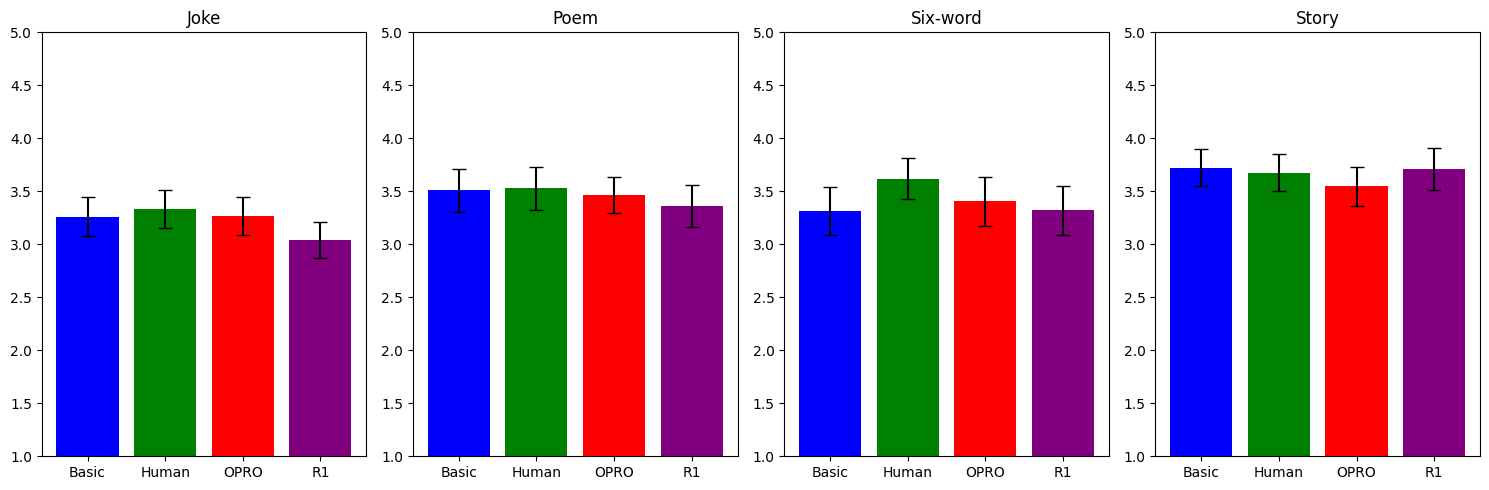

In [75]:
# Plot domain scores
def plot_domain_scores(domain_scores, save_path=None):
    """Plot the mean scores for each method and domain. Let each method be a subplot."""
    methods = ["basic", "human", "opro", "r1"]
    domains = ["joke", "poem", "six-word", "story"]
    titles = ["Joke", "Poem", "Six-word", "Story"]
    xlabels = ["Basic", "Human", "OPRO", "R1"]
    # Generate subplots for each domain
    fig, axs = plt.subplots(1, len(domains), figsize=(15, 5))
    for i, domain in enumerate(domains):
        means = [domain_scores[f"{method}_{domain}"] for method in methods]
        errors = [domain_scores[f"{method}_{domain}_moe"] for method in methods]
        axs[i].bar(xlabels, means, yerr=errors, capsize=5, color=['blue', 'green', 'red', 'purple'])
        axs[i].set_title(titles[i])
        axs[i].set_ylim(1, 5)

    plt.tight_layout()
    # Save the plot
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path)
    plt.show()
plot_domain_scores(domain_scores, save_path="figures/domain_scores.png")


In [95]:
# Get combined artifact scores
# basic - `{domain}_eval.csv`
# human - `best_{domain}_eval.csv`
# opro - `{domain}_eval.csv`
# r1 - `best_{domain}.csv`

# Load each dataframe
methods = ["basic", "human", "opro", "r1"]
domains = ["joke", "poem", "six-word", "story"]
dfs = []
for method in methods:
    for domain in domains:
        if method == "basic" or method == "opro":
            file_name = f"artifacts/{method}/{domain}_eval.csv"
        else:
            file_name = f"artifacts/{method}/best_{domain}.csv"
        df = pd.read_csv(file_name)
        # Rename columns
        if domain == "joke":
            df = df.rename(columns={"funny": "quality", "original": "novelty"})
        else:
            df = df.rename(columns={"emotional": "quality", "original": "novelty"})
        df["method"] = method
        dfs.append(df)
combined_df = pd.concat(dfs, axis=0)
combined_df

,step,instruction,artifact,domain,novelty,creative,quality,valid,score,method
0,Step None,Write a joke. The joke must be completely new ...,Why did the spreadsheet apply for a job promot...,joke,25,75,75,Valid,58.333333,basic
1,Step None,Write a joke. The joke must be completely new ...,Why did the robot break up with its Roomba?\n\...,joke,75,75,75,Valid,75.000000,basic
2,Step None,Write a joke. The joke must be completely new ...,Why don't scientists trust atoms anymore? Beca...,joke,25,75,75,Valid,58.333333,basic
3,Step None,Write a joke. The joke must be completely new ...,Why did the introverted skeleton keep to himse...,joke,25,75,75,Valid,58.333333,basic
4,Step None,Write a joke. The joke must be completely new ...,Why did the mathematician plant a garden?\n\nB...,joke,25,25,75,Valid,41.666667,basic
...,...,...,...,...,...,...,...,...,...,...
5,Step None,Write a flash fiction story. The flash fiction...,In the dim glow of the library's closing hours...,story,75,75,75,Valid,75.000000,r1
6,Step None,Write a flash fiction story. The flash fiction...,The city’s neon drizzle soaked through my coat...,story,75,75,75,Valid,75.000000,r1
7,Step None,Write a flash fiction story. The flash fiction...,A Librarian's Dilemma\nClara swept dust from t...,story,75,75,75,Valid,75.000000,r1
8,Step None,Write a flash fiction story. The flash fiction...,"The clock ticked once, twice, thrice—each chim...",story,75,75,75,Valid,75.000000,r1


In [88]:
automatic_eval = combined_df
# Remap values to 1-5 scale
automatic_eval["quality"] = automatic_eval["quality"].map({0: 1, 25: 2, 50: 3, 75: 4, 100: 5})
automatic_eval["novelty"] = automatic_eval["novelty"].map({0: 1, 25: 2, 50: 3, 75: 4, 100: 5})
automatic_eval["creative"] = automatic_eval["creative"].map({0: 1, 25: 2, 50: 3, 75: 4, 100: 5})
# Group by method and domain
grouped = automatic_eval.groupby(["method", "domain"])[["quality", "novelty", "creative"]]
# Get mean quality, novelty, and creative scores
automatic_scores = grouped.mean()
automatic_std = grouped.std()
automatic_scores

quality  novelty  creative
method domain                              
basic  joke          3.6      2.2       3.8
       poem          4.0      2.0       3.6
       six-word      4.2      3.8       4.0
       story         4.0      2.4       4.0
human  joke          4.0      3.8       4.0
       poem          4.3      2.0       4.0
       six-word      4.9      4.0       4.1
       story         4.0      3.2       4.0
opro   joke          4.0      2.8       4.0
       poem          4.2      3.8       4.1
       six-word      4.5      4.0       4.4
       story         4.0      4.0       4.5
r1     joke          3.4      3.4       4.0
       poem          4.3      3.9       4.6
       six-word      4.8      4.0       4.3
       story         4.0      4.0       4.2

In [89]:
automatic_std

quality   novelty  creative
method domain                                
basic  joke      0.843274  0.632456  0.632456
       poem      0.000000  0.000000  0.843274
       six-word  0.421637  0.632456  0.000000
       story     0.000000  0.843274  0.000000
human  joke      0.000000  0.632456  0.000000
       poem      0.483046  0.000000  0.000000
       six-word  0.316228  0.000000  0.316228
       story     0.000000  1.032796  0.000000
opro   joke      0.000000  1.032796  0.000000
       poem      0.421637  0.632456  0.316228
       six-word  0.527046  0.000000  0.516398
       story     0.000000  0.000000  0.527046
r1     joke      0.966092  1.264911  0.000000
       poem      0.483046  0.737865  0.516398
       six-word  0.421637  0.000000  0.483046
       story     0.000000  0.000000  0.421637

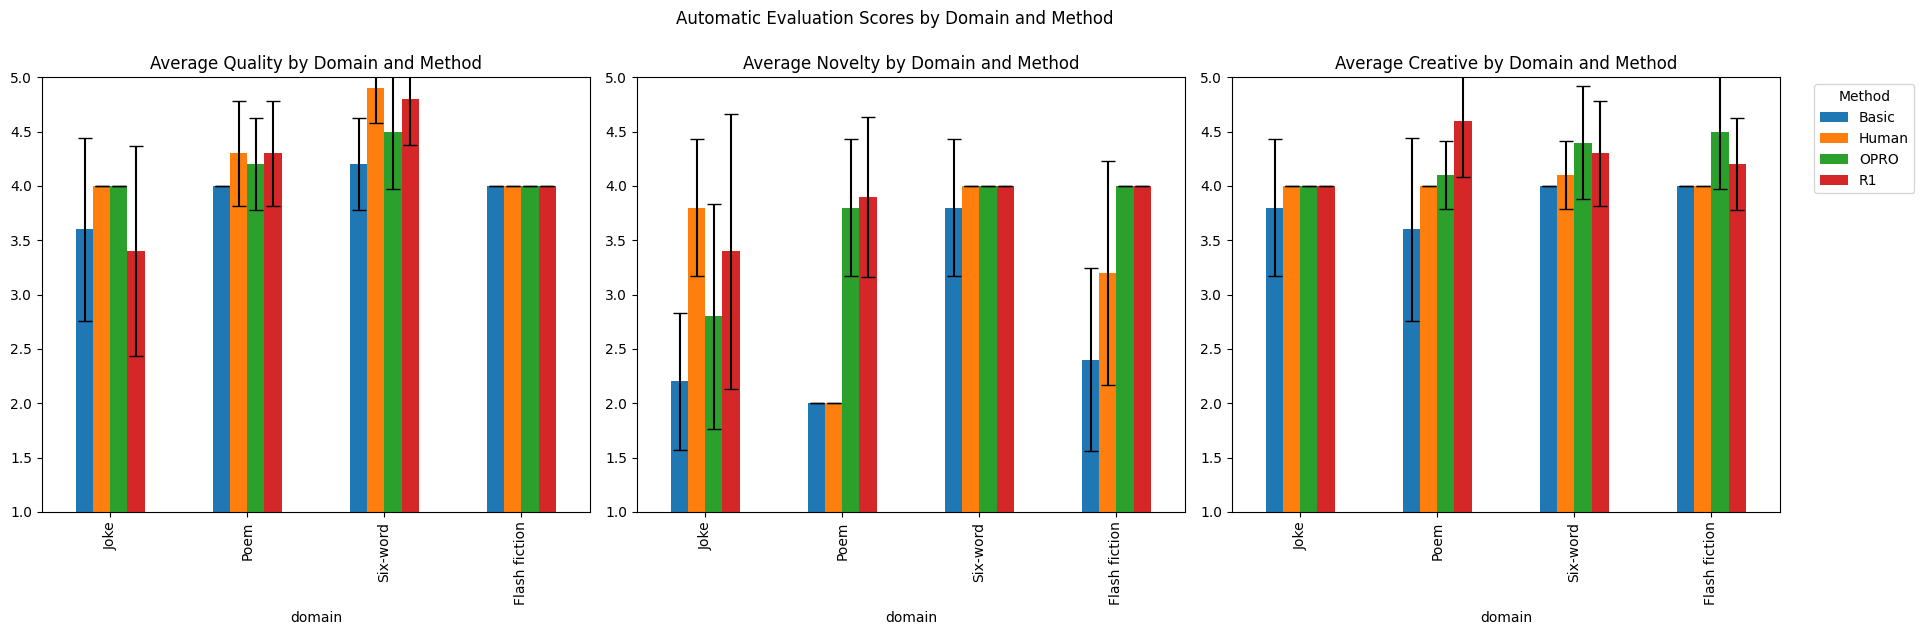

In [ ]:
# Define the desired order for domains and methods
domain_order = ["joke", "poem", "six-word", "story"]
method_order = ["basic", "human", "opro", "r1"]

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of metrics to plot
metrics = ["quality", "novelty", "creative"]

# Loop over each metric and create a bar plot
for i, metric in enumerate(metrics):
    # Unstack the scores so domains are index and methods are columns
    scores = automatic_scores[metric].unstack(level="method")
    stds = automatic_std[metric].unstack(level="method")
    
    # Reindex to ensure domains are in the specified order
    scores = scores.reindex(domain_order)
    stds = stds.reindex(domain_order)
    
    # Select columns to ensure methods are in the specified order
    scores = scores[method_order]
    stds = stds[method_order]
    
    # Remap method values
    scores.columns = scores.columns.map({"basic": "Basic", "human": "Human", "opro": "OPRO", "r1": "R1"})
    stds.columns = stds.columns.map({"basic": "Basic", "human": "Human", "opro": "OPRO", "r1": "R1"})
    # Remap domain values
    scores.index = scores.index.map({"joke": "Joke", "poem": "Poem", "six-word": "Six-word", "story": "Flash fiction"})
    stds.index = stds.index.map({"joke": "Joke", "poem": "Poem", "six-word": "Six-word", "story": "Flash fiction"})
    # Plot bar chart with error bars on the corresponding subplot
    scores.plot(
        ylim=(1, 5),         # Set the y-axis limits
        kind="bar",
        legend=False,        # Do not show the legend
        yerr=stds,           # Add error bars using standard deviations
        ax=axes[i],          # Specify the subplot axis
        capsize=5,           # Add caps to error bars for visibility
        title=f"Average {metric.capitalize()} by Domain and Method"
    )

# Adjust the layout to prevent overlap
plt.tight_layout()
# Set title
plt.suptitle("Automatic Evaluation Scores by Domain and Method", y=1.05)
# Add legend to plot
plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
# Save the plot
plt.savefig("figures/automatic_evaluation_scores.png")

# Display the plot
plt.show()

In [101]:
scores

method,Basic,Human,OPRO,R1
domain,,,,
joke,3.8,4.0,4.0,4.0
poem,3.6,4.0,4.1,4.6
six-word,4.0,4.1,4.4,4.3
story,4.0,4.0,4.5,4.2


In [125]:
mean_char_df = char_df.mean()

In [126]:
type(mean_char_df)

pandas.core.series.Series

In [129]:
mean_char_df.index

Index(['basic_joke_quality', 'basic_joke_novelty', 'basic_joke_creative',
       'human_joke_quality', 'human_joke_novelty', 'human_joke_creative',
       'opro_joke_quality', 'opro_joke_novelty', 'opro_joke_creative',
       'r1_joke_quality', 'r1_joke_novelty', 'r1_joke_creative',
       'basic_poem_quality', 'basic_poem_novelty', 'basic_poem_creative',
       'human_poem_quality', 'human_poem_novelty', 'human_poem_creative',
       'opro_poem_quality', 'opro_poem_novelty', 'opro_poem_creative',
       'r1_poem_quality', 'r1_poem_novelty', 'r1_poem_creative',
       'basic_six-word_quality', 'basic_six-word_novelty',
       'basic_six-word_creative', 'human_six-word_quality',
       'human_six-word_novelty', 'human_six-word_creative',
       'opro_six-word_quality', 'opro_six-word_novelty',
       'opro_six-word_creative', 'r1_six-word_quality', 'r1_six-word_novelty',
       'r1_six-word_creative', 'basic_story_quality', 'basic_story_novelty',
       'basic_story_creative', 'human_st

In [151]:
def process_char_df(char_df):
    mean_char_df = char_df.mean()
    std_char_df = char_df.std()
    new_df = []
    for idx, mean, std in zip(mean_char_df.index, mean_char_df, std_char_df):
        method = idx.split("_")[0]
        domain = idx.split("_")[1]
        characteristic = idx.split("_")[2]
        new_df.append([method, domain, characteristic, mean, std])
    new_df = pd.DataFrame(new_df, columns=["method", "domain", "characteristic", "mean_score", "std"])
    return new_df
processed_mean_char_df = process_char_df(char_df)
processed_mean_char_df

,method,domain,characteristic,mean_score,std
0,basic,joke,quality,3.185714,1.094027
1,basic,joke,novelty,3.257143,0.973351
2,basic,joke,creative,3.342857,0.946170
3,human,joke,quality,2.885714,1.136265
4,human,joke,novelty,3.671429,0.829203
5,human,joke,creative,3.442857,0.942333
6,opro,joke,quality,2.671429,1.212512
7,opro,joke,novelty,3.571429,0.826577
8,opro,joke,creative,3.557143,0.862012
9,r1,joke,quality,2.471429,1.138540


In [ ]:
# Define the desired order for domains and methods
domain_order = ["joke", "poem", "six-word", "story"]
method_order = ["basic", "human", "opro", "r1"]

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of metrics to plot
metrics = ["quality", "novelty", "creative"]

# Loop over each metric and create a bar plot
for i, metric in enumerate(metrics):
    # Unstack the scores so domains are index and methods are columns
    scores = automatic_scores[metric].unstack(level="method")
    stds = automatic_std[metric].unstack(level="method")
    
    # Reindex to ensure domains are in the specified order
    scores = scores.reindex(domain_order)
    stds = stds.reindex(domain_order)
    
    # Select columns to ensure methods are in the specified order
    scores = scores[method_order]
    stds = stds[method_order]
    
    # Remap method values
    scores.columns = scores.columns.map({"basic": "Basic", "human": "Human", "opro": "OPRO", "r1": "R1"})
    stds.columns = stds.columns.map({"basic": "Basic", "human": "Human", "opro": "OPRO", "r1": "R1"})
    # Remap domain values
    scores.index = scores.index.map({"joke": "Joke", "poem": "Poem", "six-word": "Six-word", "story": "Flash fiction"})
    stds.index = stds.index.map({"joke": "Joke", "poem": "Poem", "six-word": "Six-word", "story": "Flash fiction"})
    # Plot bar chart with error bars on the corresponding subplot
    scores.plot(
        ylim=(1, 5),         # Set the y-axis limits
        kind="bar",
        legend=False,        # Do not show the legend
        yerr=stds,           # Add error bars using standard deviations
        ax=axes[i],          # Specify the subplot axis
        capsize=5,           # Add caps to error bars for visibility
        title=f"Average {metric.capitalize()} by Domain and Method"
    )

# Adjust the layout to prevent overlap
plt.tight_layout()
# Set title
plt.suptitle("Automatic Evaluation Scores by Domain and Method", y=1.05)
# Add legend to plot
plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
# Save the plot
plt.savefig("figures/automatic_evaluation_scores.png")

# Display the plot
plt.show()

,0,1
0,"(basic, joke)",method domain characteristic mean_score ...
1,"(basic, poem)",method domain characteristic mean_score ...
2,"(basic, six-word)",method domain characteristic mean_score...
3,"(basic, story)",method domain characteristic mean_score ...
4,"(human, joke)",method domain characteristic mean_score ...
5,"(human, poem)",method domain characteristic mean_score ...
6,"(human, six-word)",method domain characteristic mean_score...
7,"(human, story)",method domain characteristic mean_score ...
8,"(opro, joke)",method domain characteristic mean_score ...
9,"(opro, poem)",method domain characteristic mean_score ...
